<a href="https://colab.research.google.com/github/201220095/201220095_UAS_DATAMINING/blob/main/201220095_IlhamMaulana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

%matplotlib inline
data = pd.read_csv('/content/drive/MyDrive/CirhossisDataset.csv')
data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [ ]:
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [ ]:
cat_features = []
lis = list(data.columns)
for i in lis:
    if data[i].dtype == "object":
        cat_features.append(i)
cat_features

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

# **MENGHAPUS SEMUA BARIS DIMANA NULL BERADA DI KOLOM "DRUG"**

In [ ]:
data = data.dropna(subset=['Drug'])

In [30]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan,strategy="mean")
si.fit(data.iloc[:,10:-1])

data.iloc[:,10:-1] = si.transform(data.iloc[:,10:-1])

<ipython-input-30-e75fedd88356>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.iloc[:,10:-1] = si.transform(data.iloc[:,10:-1])


In [ ]:
#CEK DATA NULL
data.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [ ]:
lii = list(data["Status"])
lii

['D',
 'C',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'D',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'D',
 'C',
 'C',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'D',
 'CL',
 'D',
 'D',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'CL',
 'D',
 'C',
 'D',
 'C',
 'D',
 'D',
 'C',
 'D',
 'C',
 'C',
 'C',
 'C',
 'D',
 'C',
 'C',
 'C',
 'D',
 'D',
 'D',
 'C',
 'C',
 'C',
 'D',
 'D',
 'C',
 'C',
 'D',
 'C',
 'D',
 'C',
 'D',
 'C',
 'CL',
 'D',
 'C',
 'C',
 'D',
 'D',
 'D',
 'D',
 'C'

In [ ]:
status = []
for i in range(len(lii)):
    if lii[i]=="D":
        status.append(0)
    elif lii[i]=="C":
        status.append(1)
    else :
        status.append(2)
status

[0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 2,
 2,
 1,
 1,
 1,


In [32]:
data["status"] = status

In [31]:
data = data.drop(["Status"], axis=1)

In [ ]:
data["Age"] = (data["Age"].values/365).round()
data.head()

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
0,1,400,D-penicillamine,59.0,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0
1,2,4500,D-penicillamine,56.0,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1
2,3,1012,D-penicillamine,70.0,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0
3,4,1925,D-penicillamine,55.0,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0
4,5,1504,Placebo,38.0,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,2


In [ ]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

**STEP EDA**

In [ ]:
data.describe().transpose().style.background_gradient(cmap = 'GnBu')

,count,mean,std,min,25%,50%,75%,max
ID,312.000000,156.500000,90.210864,1.000000,78.750000,156.500000,234.250000,312.000000
N_Days,312.000000,2006.362179,1123.280843,41.000000,1191.000000,1839.500000,2697.250000,4556.000000
Age,312.000000,50.060897,10.578423,26.000000,42.000000,50.000000,57.000000,78.000000
Bilirubin,312.000000,3.256090,4.530315,0.300000,0.800000,1.350000,3.425000,28.000000
Cholesterol,312.000000,369.510563,221.257085,120.000000,255.750000,322.000000,392.250000,1775.000000
Albumin,312.000000,3.520000,0.419892,1.960000,3.310000,3.550000,3.800000,4.640000
Copper,312.000000,97.648387,85.338190,4.000000,41.750000,73.000000,123.000000,588.000000
Alk_Phos,312.000000,1982.655769,2140.388824,289.000000,871.500000,1259.000000,1980.000000,13862.400000
SGOT,312.000000,122.556346,56.699525,26.350000,80.600000,114.700000,151.900000,457.250000
Tryglicerides,312.000000,124.702128,61.926753,33.000000,87.000000,114.000000,145.250000,598.000000


<ipython-input-17-ea303e583df7>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasi = data.corr()


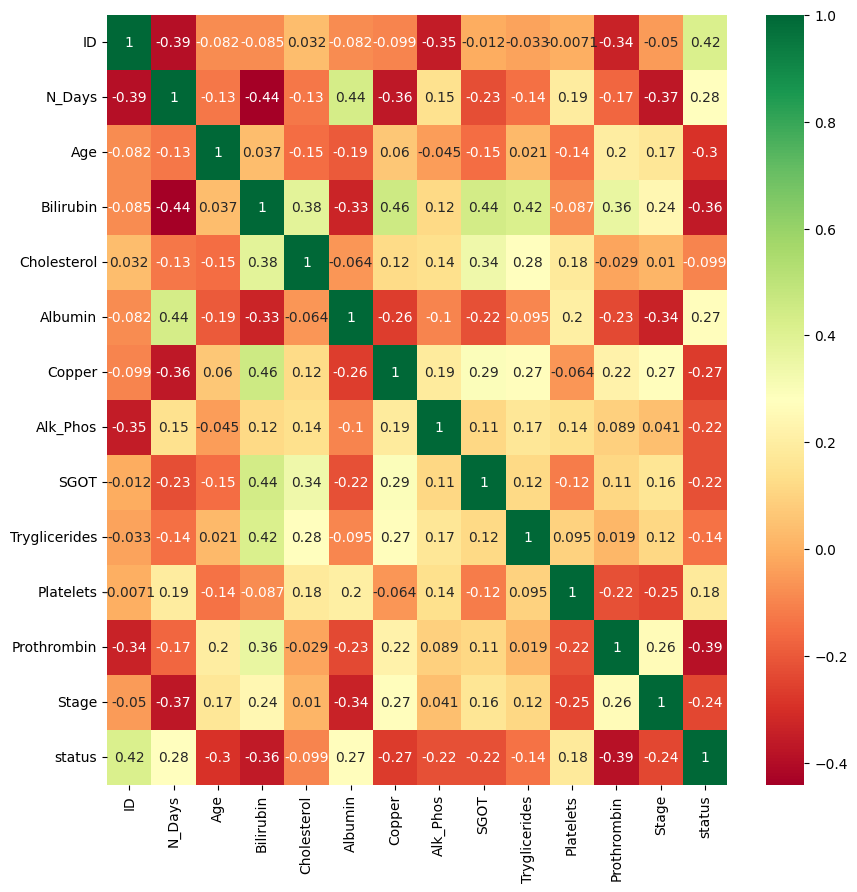

In [ ]:
#Korelasi menggunakan heatmap
import seaborn as sns

korelasi = data.corr()
features = korelasi.index
plt.figure(figsize=(10,10))

#plot heat map
g=sns.heatmap(data[features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
#korelasi data
data.corr()

<ipython-input-18-4739eaf6a0c0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
ID,1.000000,-0.392999,-0.082230,-0.085152,0.031800,-0.082337,-0.098515,-0.352856,-0.012097,-0.032874,-0.007141,-0.340261,-0.050346,0.419732
N_Days,-0.392999,1.000000,-0.129855,-0.441793,-0.130596,0.435849,-0.364148,0.149269,-0.225492,-0.144523,0.190822,-0.168299,-0.371641,0.276293
Age,-0.082230,-0.129855,1.000000,0.036831,-0.149957,-0.194180,0.060187,-0.044525,-0.149357,0.021133,-0.138718,0.195639,0.167718,-0.295340
Bilirubin,-0.085152,-0.441793,0.036831,1.000000,0.380560,-0.334638,0.456512,0.116984,0.441730,0.418504,-0.086808,0.361742,0.241367,-0.360330
Cholesterol,0.031800,-0.130596,-0.149957,0.380560,1.000000,-0.063955,0.123024,0.140112,0.337282,0.276828,0.177974,-0.029407,0.010395,-0.098945
Albumin,-0.082337,0.435849,-0.194180,-0.334638,-0.063955,1.000000,-0.264312,-0.101456,-0.220047,-0.094699,0.202989,-0.234013,-0.336970,0.269918
Copper,-0.098515,-0.364148,0.060187,0.456512,0.123024,-0.264312,1.000000,0.187285,0.293547,0.272473,-0.064120,0.217877,0.268273,-0.267403
Alk_Phos,-0.352856,0.149269,-0.044525,0.116984,0.140112,-0.101456,0.187285,1.000000,0.112217,0.168702,0.142792,0.089384,0.041273,-0.216608
SGOT,-0.012097,-0.225492,-0.149357,0.441730,0.337282,-0.220047,0.293547,0.112217,1.000000,0.119463,-0.119533,0.112174,0.164945,-0.219250
Tryglicerides,-0.032874,-0.144523,0.021133,0.418504,0.276828,-0.094699,0.272473,0.168702,0.119463,1.000000,0.094736,0.019149,0.115358,-0.142510


In [ ]:
#statistika dasar
data.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,status
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,156.500000,2006.362179,50.060897,3.256090,369.510563,3.520000,97.648387,1982.655769,122.556346,124.702128,261.935065,10.725641,3.032051,0.660256
std,90.210864,1123.280843,10.578423,4.530315,221.257085,0.419892,85.338190,2140.388824,56.699525,61.926753,94.991905,1.004323,0.877880,0.589259
min,1.000000,41.000000,26.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000,0.000000
25%,78.750000,1191.000000,42.000000,0.800000,255.750000,3.310000,41.750000,871.500000,80.600000,87.000000,200.000000,10.000000,2.000000,0.000000
50%,156.500000,1839.500000,50.000000,1.350000,322.000000,3.550000,73.000000,1259.000000,114.700000,114.000000,258.500000,10.600000,3.000000,1.000000
75%,234.250000,2697.250000,57.000000,3.425000,392.250000,3.800000,123.000000,1980.000000,151.900000,145.250000,322.000000,11.100000,4.000000,1.000000
max,312.000000,4556.000000,78.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000,2.000000


In [ ]:
#checking skewness dari data
cirrosis_true_count =len(data.loc[data['status']==1])
cirrosis_false_count = len(data.loc[data['status']==0])

In [ ]:
#view
(cirrosis_true_count,cirrosis_false_count)

(168, 125)

In [ ]:
#Missing value
print('total number of rows : {0}'.format(data.shape[0]))
print('total number of columns : {0}'.format(data.shape[1]))

total number of rows : 312
total number of columns : 20


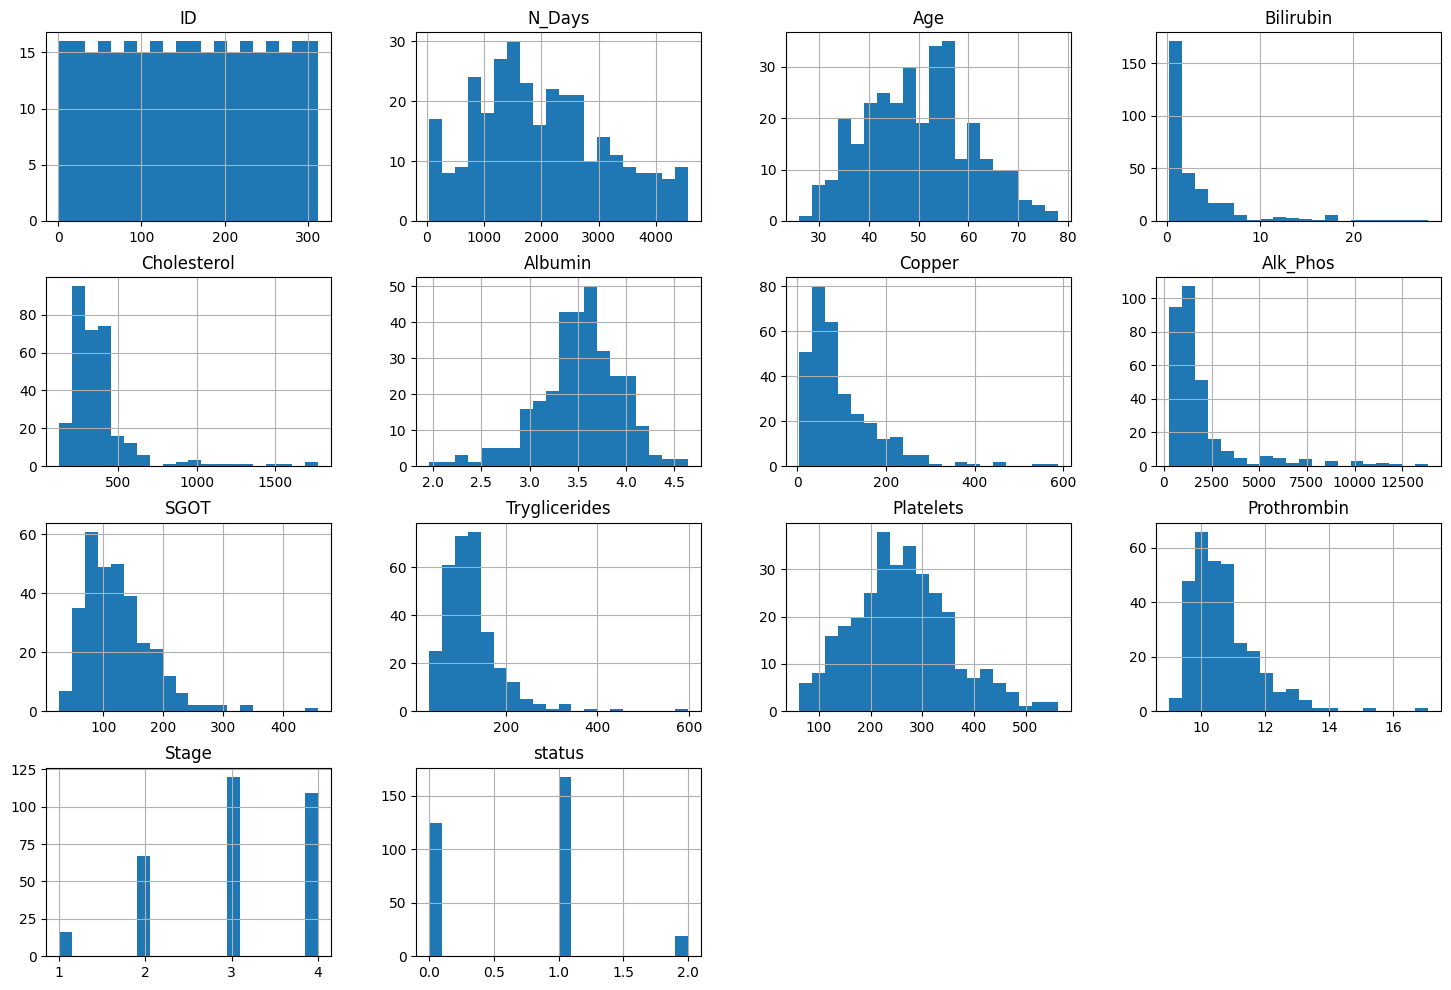

In [ ]:
data.hist(bins=20, figsize=(18,12))
plt.show()

In [ ]:
#make pairplot
sns.pairplot(data,hue='Stage',palette='magma',height=3.5)
plt.tight_layout()

# **RANDOM FOREST CLASSIFICATION**

In [33]:
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), [1, 3, 4, 5, 6, 7])], remainder="passthrough" )
X = np.array(ct.fit_transform(X))

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 2)

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, criterion="entropy")
rf.fit(X_train, y_train)
y_predrf = rf.predict(X_test)
rfmean = cross_val_score(estimator=rf, X=X_train, y=y_train, cv =10)

In [38]:
#Melihat score dan tingkat akurasi menggunakan Random Forest
from sklearn.metrics import mean_absolute_error
print(f"Random Forest Mean Score : {mean_absolute_error(y_test, y_predrf)}")
print(f"Random Forest Accuracy : {rfmean.mean()*100} %\n")

Random Forest Mean Score : 0.30158730158730157
Random Forest Accuracy : 80.30000000000001 %



# **SAVE MODEL**

In [39]:
import pickle

pickle.dump(data,open('cirrosis.pkl','wb'))